## Load and Clean Datasets and Create NBA Players Database

In this notebook, we will load all of the datasets obtained from the internet through APIs, Kaggle, and other methods and clean the datasets for usage. We will use pandas and SQL to load and merge the datasets to create one master dataset for prediction.

The database will feature NBA player stats, injury information, jersey sales information, team valuation information, and salaries.

In [1]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
from datetime import datetime
import os

# Define the path for the SQLite database
sqlite_db_path = '/home/mn712/cs210/PredictiveNBAContractValuationModel/nba_players.db'

# Remove existing SQLite DB if you want a fresh start (optional)
if os.path.exists(sqlite_db_path):
    os.remove(sqlite_db_path)

# Create a connection string for SQLite
connection_string = f'sqlite:///{sqlite_db_path}'

# Create the SQLite engine
engine = create_engine(connection_string)

#### Load and Clean NBA Advanced Stats

This dataset includes all of the advanced stats for all NBA players from 2019-2024.

In [2]:
# Load the data from the CSV file
df = pd.read_csv(r"/home/mn712/cs210/PredictiveNBAContractValuationModel/NBA Advanced Stats(2019 - 2024).csv")
print(f"Loaded NBA Advanced Stats with {df.shape[0]} rows.")

# Initial exploration of the data
print("First 5 rows of the NBA Advanced Stats dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nColumn names:")
print(df.columns)

## DATA CLEANING

# Drop rows with missing values in 'Player' or 'Season'
df_cleaned = df.dropna(subset=['Player', 'Season'])
print(f"After dropping missing values: {df_cleaned.shape[0]} rows.")

# Remove duplicates: Keep the row with the greater 'MP' value
df_cleaned = df_cleaned.sort_values(by='MP', ascending=False).drop_duplicates(subset=['Player', 'Season'], keep='first')
print(f"After removing duplicates: {df_cleaned.shape[0]} rows.")

# Create a unique player ID based on the combination of 'Season' and 'Player'
df_cleaned['Unnamed: 0'] = df_cleaned['Season'].astype(str) + "_" + df_cleaned['Player']

# Rename columns for consistency
df_cleaned = df_cleaned.rename(columns={'Unnamed: 0': 'Player_ID'})
df_cleaned = df_cleaned.rename(columns={'MP': 'Total MP'})

# Sort by 'Player_ID' in ascending order and reset index
df_cleaned = df_cleaned.sort_values(by='Player_ID').reset_index(drop=True)
print(df_cleaned.head())

# Import the DataFrame into the SQLite database
df_cleaned.to_sql('nba_advanced_stats', engine, if_exists='replace', index=False)
print("Imported 'nba_advanced_stats' into SQLite database.\n")

Loaded NBA Advanced Stats with 4296 rows.
First 5 rows of the NBA Advanced Stats dataset:
   Unnamed: 0  Season         Player   Age Team Pos     G    GS      MP   PER  \
0           0    2019   Bradley Beal  25.0  WAS  SG  82.0  82.0  3028.0  20.8   
1           1    2019   James Harden  29.0  HOU  PG  78.0  78.0  2867.0  30.6   
2           2    2019   Kemba Walker  28.0  CHO  PG  82.0  82.0  2863.0  21.7   
3           3    2019  Tobias Harris  26.0  2TM  PF  82.0  82.0  2847.0  17.2   
4           4    2019  Tobias Harris  26.0  LAC  PF  55.0  55.0  1903.0  18.2   

   ...  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP         Awards  
0  ...  28.4   5.9  1.7   7.6  0.120   3.8  -0.8   2.9   3.7             AS  
1  ...  40.5  11.4  3.8  15.2  0.254   9.4   1.6  11.0   9.3  MVP-2,AS,NBA1  
2  ...  31.5   5.5  1.9   7.4  0.123   5.2  -1.0   4.2   4.4        AS,NBA3  
3  ...  22.8   4.5  2.6   7.1  0.120   2.1  -0.5   1.6   2.6            NaN  
4  ...  23.5   3.2  1.8   5.0  0.

#### Load and Clean NBA Per Game Playoff Stats

This dataset has stats for all players from 2019-2024 who were part of playoff games for each year.

The primary key is Player_ID.

In [3]:
# Load the data
df2 = pd.read_csv(r"/home/mn712/cs210/PredictiveNBAContractValuationModel/NBA Per Game PLAYOFF Stats(2019 - 2024).csv")
print(f"Loaded NBA Per Game Playoff Stats with {df2.shape[0]} rows.")

# Initial exploration
print("First 5 rows of the NBA Per Game Playoff Stats dataset:")
print(df2.head())

print("\nDataset Info:")
print(df2.info())

print("\nSummary Statistics:")
print(df2.describe())

print("\nMissing values in each column:")
print(df2.isnull().sum())

print("\nColumn names:")
print(df2.columns)

## DATA CLEANING

# Drop rows with missing values in 'Player' or 'Season'
df2_cleaned = df2.dropna(subset=['Player', 'Season'])
print(f"After dropping missing values: {df2_cleaned.shape[0]} rows.")

# Remove duplicates: Keep the first occurrence
df2_cleaned = df2_cleaned.drop_duplicates(subset=['Player', 'Season'], keep='first')
print(f"After removing duplicates: {df2_cleaned.shape[0]} rows.")

# Create a unique player ID
df2_cleaned['Unnamed: 0'] = df2_cleaned['Season'].astype(str) + "_" + df2_cleaned['Player']

# Rename columns for consistency
df2_cleaned = df2_cleaned.rename(columns={'Unnamed: 0': 'Player_ID'})
df2_cleaned = df2_cleaned.rename(columns={'MP': 'MPG'})

# Sort and reset index
df2_cleaned = df2_cleaned.sort_values(by='Player_ID').reset_index(drop=True)
print(df2_cleaned.head())

# Import into SQLite
df2_cleaned.to_sql('nba_playoff_stats', engine, if_exists='replace', index=False)
print("Imported 'nba_playoff_stats' into SQLite database.\n")


Loaded NBA Per Game Playoff Stats with 1377 rows.
First 5 rows of the NBA Per Game Playoff Stats dataset:
   Unnamed: 0  Season             Player Pos   Age   Tm     G    GS    MP  \
0           0    2019       Steven Adams   C  25.0  OKC   5.0   5.0  31.8   
1           1    2019  LaMarcus Aldridge   C  33.0  SAS   7.0   7.0  34.9   
2           2    2019      Grayson Allen  SG  23.0  UTA   2.0   0.0   7.0   
3           3    2019      Jarrett Allen   C  20.0  BRK   5.0   5.0  22.0   
4           4    2019    Al-Farouq Aminu  PF  28.0  POR  16.0  16.0  24.9   

    FG  ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  5.6  ...  0.375  2.4  4.8  7.2  1.4  1.0  1.0  1.8  2.6  11.8  
1  7.9  ...  0.818  2.7  6.9  9.6  2.7  0.7  1.0  1.0  3.0  20.0  
2  1.0  ...  0.714  0.0  0.5  0.5  0.0  0.0  0.0  0.0  0.0   4.5  
3  3.8  ...   0.85  3.0  3.8  6.8  2.2  0.6  0.6  1.6  2.6  11.0  
4  2.4  ...   0.75  1.8  4.4  6.3  1.3  0.6  0.6  1.0  2.1   7.4  

[5 rows x 31 columns]

Datas

#### Load and Clean NBA Per Game Stats

This dataset includes NBA statistics that are not in the advanced stats. The idea is to have the most comprehensive dataset to account for all performance factors dictating a contract. 

Once again, the primary key is Player_ID

In [4]:
# Load the data
df3 = pd.read_csv(r"/home/mn712/cs210/PredictiveNBAContractValuationModel/NBA Per Game Stats(2019 - 2024).csv")
print(f"Loaded NBA Per Game Stats with {df3.shape[0]} rows.")

# Initial exploration
print("First 5 rows of the NBA Per Game Stats dataset:")
print(df3.head())

print("\nDataset Info:")
print(df3.info())

print("\nSummary Statistics:")
print(df3.describe())

print("\nMissing values in each column:")
print(df3.isnull().sum())

print("\nColumn names:")
print(df3.columns)

## DATA CLEANING

# Drop rows with missing values in 'Player' or 'Season'
df3_cleaned = df3.dropna(subset=['Player', 'Season'])
print(f"After dropping missing values: {df3_cleaned.shape[0]} rows.")

# Remove duplicates: Keep the first occurrence
df3_cleaned = df3_cleaned.drop_duplicates(subset=['Player', 'Season'], keep='first')
print(f"After removing duplicates: {df3_cleaned.shape[0]} rows.")

# Create a unique player ID
df3_cleaned['Unnamed: 0'] = df3_cleaned['Season'].astype(str) + "_" + df3_cleaned['Player']

# Rename columns for consistency
df3_cleaned = df3_cleaned.rename(columns={'Unnamed: 0': 'Player_ID'})
df3_cleaned = df3_cleaned.rename(columns={'MP': 'MPG'})

# Sort and reset index
df3_cleaned = df3_cleaned.sort_values(by='Player_ID').reset_index(drop=True)
print(df3_cleaned.head())

# Import into SQLite
df3_cleaned.to_sql('nba_per_game_stats', engine, if_exists='replace', index=False)
print("Imported 'nba_per_game_stats' into SQLite database.\n")


Loaded NBA Per Game Stats with 4296 rows.
First 5 rows of the NBA Per Game Stats dataset:
   Unnamed: 0  Season                 Player   Age Team Pos     G    GS    MP  \
0           0    2019           James Harden  29.0  HOU  PG  78.0  78.0  36.8   
1           1    2019            Paul George  28.0  OKC  SF  77.0  77.0  36.9   
2           2    2019  Giannis Antetokounmpo  24.0  MIL  PF  72.0  72.0  32.8   
3           3    2019            Joel Embiid  24.0  PHI   C  64.0  64.0  33.7   
4           4    2019           LeBron James  34.0  LAL  SF  55.0  55.0  35.2   

     FG  ...  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0  10.8  ...  0.8   5.8   6.6  7.5  2.0  0.7  5.0  3.1  36.1   
1   9.2  ...  1.4   6.8   8.2  4.1  2.2  0.4  2.7  2.8  28.0   
2  10.0  ...  2.2  10.3  12.5  5.9  1.3  1.5  3.7  3.2  27.7   
3   9.1  ...  2.5  11.1  13.6  3.7  0.7  1.9  3.5  3.3  27.5   
4  10.1  ...  1.0   7.4   8.5  8.3  1.3  0.6  3.6  1.7  27.4   

                 Awards  
0         MV

#### Load and Clean NBA Player Injury Stats

This dataset gave information about which players got injured, when they got injured, and what their injury was. The goal of cleaning and transforming this dataset was to provide the total injury days per player from 2019-2024 to show their availabilities during the season. We believe greater injury days should reduce the salary price. 

In [ ]:
df4 = pd.read_csv(r"/home/mn712/cs210/PredictiveNBAContractValuationModel/NBA Player Injury Stats(2019 - 2024).csv")
print(f"Loaded NBA Player Injury Stats with {df4.shape[0]} rows.")

print(df4.columns)

import pandas as pd
from datetime import datetime

df4['Date'] = pd.to_datetime(df4['Date'], errors='coerce')

df4['Player'] = df4['Acquired'].fillna(df4['Relinquished']) # Identify the player name in each row

# Store total injury days per player
player_injury_days = {}

for player in df4['Player'].unique():
    # Filter rows for this player and sort by Date
    player_data = df4[(df4['Relinquished'] == player) | (df4['Acquired'] == player)].sort_values(by='Date')

    total_injury_days = 0
    injury_start = None

    for _, row in player_data.iterrows():
        if row['Relinquished'] == player:
            # Start a new injury period if no ongoing injury
            if injury_start is None:
                injury_start = row['Date']
                print(f"Start injury: {injury_start} for {player}")
        elif row['Acquired'] == player and injury_start is not None:
            # End the current injury period
            injury_end = row['Date']
            print(f"End injury: {injury_end} for {player}")

            # Calculate injury days
            if injury_start < injury_end:
                injury_days = (injury_end - injury_start).days
                total_injury_days += injury_days
                print(f"Added {injury_days} days for {player}")
            else:
                print(f"Invalid period: {injury_start} -> {injury_end} for {player}")

            # Reset injury_start
            injury_start = None

    # Handle open-ended injuries
    if injury_start is not None:
        # End on the next July 6 or 2024-11-24 --> this either represents the end of the trade deadline or the latest day of data provided
        year = injury_start.year
        cutoff_date = datetime(year, 7, 6) if injury_start < datetime(year, 7, 6) else datetime(year + 1, 7, 6)
        injury_end = min(cutoff_date, datetime(2024, 11, 24))

        # Add only valid days
        if injury_start < injury_end:
            injury_days = (injury_end - injury_start).days
            total_injury_days += injury_days
            print(f"Open-ended injury: Added {injury_days} days for {player}")
        else:
            print(f"Invalid open-ended period: {injury_start} -> {injury_end} for {player}")

    # Store total injury days for this player
    player_injury_days[player] = total_injury_days
    print(f"Total days for {player}: {total_injury_days}\n")

print(player_injury_days)

## Clean the player names since there are unwanted words and characters in there

import re

# Clean the player names in the player_injury_days dictionary
cleaned_player_injury_days = {}

for player, injury_days in player_injury_days.items():
    # Ensure player is a string (handle NaN or other non-string values)
    if isinstance(player, str):
        # Remove unwanted text within parentheses
        cleaned_name = re.sub(r'\(.*?\)', '', player)
        # Keep only the name after the last '/'
        cleaned_name = cleaned_name.split('/')[-1]
        cleaned_player_injury_days[cleaned_name] = injury_days
    else:
        # If it's not a string, skip or assign a placeholder
        cleaned_player_injury_days[str(player)] = injury_days

print(cleaned_player_injury_days)


df4['Injury_Days'] = df4['Player'].map(cleaned_player_injury_days)

print(df4.head())

# Import into SQLite
df4.to_sql('nba_injury_days', engine, if_exists='replace', index=False)
print("Imported 'nba_injury_days' into SQLite database.\n")

#### Load and Clean NBA Salaries

We want to load this dataset to get all of the yearly salaries for each player in the dataset and add the salaries where the Player_ID matches. Therefore, there is appropriate information for analysis on a yearly basis for the entire NBA.

In [6]:
# Load the data
df5 = pd.read_csv(r"/home/mn712/cs210/PredictiveNBAContractValuationModel/NBA Salaries(2019-2024).csv")
print(f"Loaded NBA Salaries with {df5.shape[0]} rows.")

print(df5.head(20))

# Transform
df5_melted = pd.melt(
    df5,
    id_vars=["Unnamed: 0", "playerName"],
    var_name="Year",
    value_name="Salary"
)

# We want the latest salary as this includes bonuses
df5_melted["Year"] = df5_melted["Year"].str.replace(r"\(\*\)", "", regex=True).str.strip()
df5_melted["Year"] = df5_melted["Year"].str[:4]  

df5_melted.head()
df5_melted["Unnamed: 0"] = df5_melted["Year"] + "_" + df5_melted["playerName"]

df5_melted = df5_melted.rename(columns={'Unnamed: 0': 'Player_ID'})

# Remove "$" and "," from Salary column and convert it to numeric
df5_melted["Salary"] = df5_melted["Salary"].str.replace("[$,]", "", regex=True).astype(float)

# Sort by playerName, Year, and then keep the last value for duplicates
df5_melted = df5_melted.sort_values(by=["playerName", "Year"]).groupby(["playerName", "Year"]).nth(-1).reset_index()

# Reorder the columns
df5_melted = df5_melted[["Player_ID", "Year", "playerName", "Salary"]]
print("Cleaned NBA Salaries DataFrame:")
print(df5_melted.head(10))

# Import into SQLite
df5_melted.to_sql('nba_salaries', engine, if_exists='replace', index=False)
print("Imported 'nba_salaries' into SQLite database.\n")

Loaded NBA Salaries with 983 rows.
    Unnamed: 0         playerName      2019/20   2019/20(*)      2020/21  \
0            0      Stephen Curry  $40,231,758  $49,346,703  $43,006,362   
1            1  Russell Westbrook  $38,506,482  $47,230,546  $41,358,814   
2            2         Chris Paul  $38,506,482  $47,230,546  $41,358,814   
3            3       James Harden  $38,199,000  $46,853,401  $41,254,920   
4            4          John Wall  $38,199,000  $46,853,401  $41,254,920   
5            5       LeBron James  $37,436,858  $45,918,587  $39,219,566   
6            6       Kevin Durant  $37,199,000  $45,626,840  $40,108,950   
7            7      Blake Griffin  $34,449,964  $42,254,980  $33,900,241   
8            8         Kyle Lowry  $33,296,296  $40,839,936  $30,500,000   
9            9        Paul George  $33,005,556  $40,483,325  $35,450,412   
10          10       Kemba Walker  $32,742,000  $40,160,058  $34,379,100   
11          11      Klay Thompson  $32,742,000  $40,1

#### Load and Clean NBA Team Valuations

This dataset gives information about the values of each team. Some teams or worth more than others which is a factor in the contract sizes they are able to offer. Therefore, we need to take them into account and add that for each player where the Team code matches in each dataset. 

In [7]:
# Load the data
df6 = pd.read_csv(r"/home/mn712/cs210/PredictiveNBAContractValuationModel/NBA_Team_Valuations_2024.csv")
print("Loaded NBA Team Valuations:")
print(df6)

# Calculate mean and standard deviation for Valuation
mean_valuation = df6["Valuation (in billions)"].mean()
std_valuation = df6["Valuation (in billions)"].std()

# Calculate z-scores
df6["Z-Score"] = (df6["Valuation (in billions)"] - mean_valuation) / std_valuation

# Apply scaling factor and set bounds for the multipliers as it should not affect the contract too much
# This helps for standardization
scaling_factor = 0.1  
df6["Valuation_Multiplier"] = 1 + (scaling_factor * df6["Z-Score"])
df6["Valuation_Multiplier"] = df6["Valuation_Multiplier"].clip(lower=0.8, upper=1.2)
print(df6.head())

# Import into SQLite
df6.to_sql('nba_team_valuations', engine, if_exists='replace', index=False)
print("Imported 'nba_team_valuations' into SQLite database.\n")


Loaded NBA Team Valuations:
    Rank Team  Valuation (in billions)
0      1  GSW                     8.80
1      2  NYK                     7.50
2      3  LAL                     7.10
3      4  BOS                     6.00
4      5  LAC                     5.50
5      6  CHI                     5.00
6      7  HOU                     4.90
7      8  BRK                     4.80
8      9  DAL                     4.70
9     10  PHI                     4.60
10    11  TOR                     4.40
11    12  PHO                     4.30
12    13  MIA                     4.25
13    14  WAS                     4.10
14    15  MIL                     4.00
15    16  CLE                     3.95
16    17  DEN                     3.90
17    18  SAS                     3.85
18    19  ATL                     3.80
19    20  SAC                     3.70
20    21  OKC                     3.65
21    22  IND                     3.60
22    23  UTA                     3.55
23    24  POR                     3.

#### Load and Clean NBA Jersey Sales

This gives information of which players were in the Top 15 for Jersey Sales. This contributes to their contracts as a bigger brand attracts more attention to the team. This increases sales and increases the value of the team. Therefore, players who have a lot of jersey sales receive larger contracts. 

This only applies to players for 2023 as this is the latest branding. 

In [8]:
# Load the data
df7 = pd.read_csv(r"/home/mn712/cs210/PredictiveNBAContractValuationModel/Top_NBA_Jersey_Sales.csv")
print("Loaded Top NBA Jersey Sales:")
print(df7.head())

df_sub = df7[["2023-2024", "Multiplier"]].copy()
df_sub["Player_ID"] = "2023_" + df_sub["2023-2024"]

# Rename columns
df_sub = df_sub.rename(columns={"2023-2024": "Player_Name", "Multiplier": "Jerseys Multiplier"})
print(df_sub.head())

# Import into SQLite
df_sub.to_sql('nba_jersey_sales', engine, if_exists='replace', index=False)
print("Imported 'nba_jersey_sales' into SQLite database.\n")

print("All tables have been successfully imported into the SQLite database 'nba_players.db'.")


Loaded Top NBA Jersey Sales:
   Unnamed: 0              2019-2020              2020-2021      2021-2022  \
0           1           LeBron James           LeBron James   LeBron James   
1           2            Luka Doncic  Giannis Antetokounmpo   James Harden   
2           3          Anthony Davis           Kevin Durant  Stephen Curry   
3           4           Jayson Tatum            Luka Dončić   Kevin Durant   
4           5  Giannis Antetokounmpo           Jayson Tatum   Jayson Tatum   

               2022-2023              2023-2024  Multiplier  
0           LeBron James          Stephen Curry    1.250000  
1          Stephen Curry           Jayson Tatum    1.239286  
2           Jayson Tatum           LeBron James    1.228571  
3  Giannis Antetokounmpo      Victor Wembanyama    1.217857  
4            Luka Doncic  Giannis Antetokounmpo    1.207143  
             Player_Name  Jerseys Multiplier                   Player_ID
0          Stephen Curry            1.250000          202

#### Create an Aggregate Table with ONLY Active Players

Here, we will use SQL to create an aggregate table that will house all information for each player per season. We will populate the full stats table using the primary keys of each individual dataset, and we will use SQL statements to accomplish this. We

Then, we will use an SQL statement to get a subtable of players that excludes inactive/retired players and only has players that are still in the NBA. 

## import sqlite3

# Connect to SQLite database
connection = sqlite3.connect('nba_players.db')  
cursor = connection.cursor()

create_table_query = """
CREATE TABLE IF NOT EXISTS nba_full_stats (
    Player_ID INTEGER,
    Player TEXT,
    Team TEXT,
    Pos TEXT,
    Age INTEGER,
    G INTEGER,
    GS INTEGER,
    MPG REAL,
    FG REAL,
    FGA REAL,
    "3P" REAL,
    "3PA" REAL,
    "3P%" REAL,
    "2P" REAL,
    "2PA" REAL,
    "2P%" REAL,
    eFG_percent REAL,
    FT REAL,
    FTA REAL,
    "FT%" REAL,
    ORB REAL,
    DRB REAL,
    TRB REAL,
    AST REAL,
    STL REAL,
    BLK REAL,
    TOV REAL,
    PF REAL,
    PTS REAL,
    Total_MP REAL,
    PER REAL,
    TS_percent REAL,
    "3PAr" REAL,
    "FTr" REAL,
    ORB_percent REAL,
    DRB_percent REAL,
    TRB_percent REAL,
    AST_percent REAL,
    STL_percent REAL,
    BLK_percent REAL,
    TOV_percent REAL,
    USG_percent REAL,
    OWS REAL,
    DWS REAL,
    WS REAL,
    WS_per_48 REAL,
    OBPM REAL,
    DBPM REAL,
    BPM REAL,
    VORP REAL,
    p_G TEXT,
    p_GS TEXT,
    p_MPG TEXT,
    p_FG TEXT,
    p_FGA TEXT,
    p_FG_percent TEXT,
    p_3P TEXT,
    p_3PA TEXT,
    p_3P_percent TEXT,
    p_2P TEXT,
    p_2PA TEXT,
    p_2P_percent TEXT,
    p_eFG_percent TEXT,
    p_FT TEXT,
    p_FTA TEXT,
    p_FT_percent TEXT,
    p_ORB TEXT,
    p_DRB TEXT,
    p_TRB TEXT,
    p_AST TEXT,
    p_STL TEXT,
    p_BLK TEXT,
    p_TOV TEXT,
    p_PF TEXT,
    p_PTS TEXT,
    Jerseys_Multiplier REAL,
    Salary REAL,
    Injury_Days INTEGER,
    Valuation_Multiplier REAL
);
"""

cursor.execute(create_table_query)

import sqlite3
connection = sqlite3.connect('nba_players.db')  
cursor = connection.cursor()

insert_query = """
INSERT INTO nba_full_stats (
    Player_ID, Player, Team, Pos, Age, G, GS, Total_MP, PER, TS_percent, 
    "3PAr", "FTr", ORB_percent, DRB_percent, TRB_percent, AST_percent, STL_percent, 
    BLK_percent, TOV_percent, USG_percent, OWS, DWS, WS, WS_per_48, OBPM, DBPM, 
    BPM, VORP
)
SELECT 
    Player_ID, Player, Team, Pos, Age, G, GS, 
    "Total MP", PER, "TS%", "3PAr", "FTr", "ORB%", "DRB%", 
    "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%", OWS, 
    DWS, WS, "WS/48", OBPM, DBPM, BPM, VORP
FROM nba_advanced_stats;
"""
cursor.execute(insert_query)
connection.commit()

update_query_game_stat = """
UPDATE nba_full_stats
SET 
    MPG = (SELECT MPG FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    FG = (SELECT FG FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    FGA = (SELECT FGA FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    "3P" = (SELECT "3P" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    "3PA" = (SELECT "3PA" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    "3P%" = (SELECT "3P%" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    "2P" = (SELECT "2P" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    "2PA" = (SELECT "2PA" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    "2P%" = (SELECT "2P%" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    eFG_percent = (SELECT "eFG%" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    FT = (SELECT FT FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    FTA = (SELECT FTA FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    "FT%" = (SELECT "FT%" FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    ORB = (SELECT ORB FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    DRB = (SELECT DRB FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    TRB = (SELECT TRB FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    AST = (SELECT AST FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    STL = (SELECT STL FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    BLK = (SELECT BLK FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    TOV = (SELECT TOV FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    PF = (SELECT PF FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID),
    PTS = (SELECT PTS FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID)
WHERE EXISTS (SELECT 1 FROM nba_per_game_stats WHERE nba_per_game_stats.Player_ID = nba_full_stats.Player_ID);
"""

cursor.execute(update_query_game_stat)
connection.commit()

update_playoff_query = """
UPDATE nba_full_stats
SET 
    p_G = (SELECT G FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_GS = (SELECT GS FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_MPG = (SELECT MPG FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_FG = (SELECT FG FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_FGA = (SELECT FGA FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_FG_percent = (SELECT "FG%" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_3P = (SELECT "3P" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_3PA = (SELECT "3PA" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_3P_percent = (SELECT "3P%" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_2P = (SELECT "2P" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_2PA = (SELECT "2PA" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_2P_percent = (SELECT "2P%" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_eFG_percent = (SELECT "eFG%" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_FT = (SELECT FT FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_FTA = (SELECT FTA FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_FT_percent = (SELECT "FT%" FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_ORB = (SELECT ORB FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_DRB = (SELECT DRB FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_TRB = (SELECT TRB FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_AST = (SELECT AST FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_STL = (SELECT STL FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_BLK = (SELECT BLK FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_TOV = (SELECT TOV FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_PF = (SELECT PF FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID),
    p_PTS = (SELECT PTS FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID)
WHERE EXISTS (SELECT 1 FROM nba_playoff_stats WHERE nba_playoff_stats.Player_ID = nba_full_stats.Player_ID);
"""

cursor.execute(update_playoff_query)
connection.commit()

update_jerseys_query = """
UPDATE nba_full_stats
SET Jerseys_Multiplier = (
    SELECT "Jerseys Multiplier"
    FROM nba_jersey_sales
    WHERE nba_jersey_sales.Player_ID = nba_full_stats.Player_ID
)
WHERE EXISTS (
    SELECT 1
    FROM nba_jersey_sales
    WHERE nba_jersey_sales.Player_ID = nba_full_stats.Player_ID
);
"""

cursor.execute(update_jerseys_query)
connection.commit()

update_salary_query = """
UPDATE nba_full_stats
SET Salary = (
    SELECT Salary
    FROM nba_salaries
    WHERE nba_salaries.Player_ID = nba_full_stats.Player_ID
)
WHERE EXISTS (
    SELECT 1
    FROM nba_salaries
    WHERE nba_salaries.Player_ID = nba_full_stats.Player_ID
);
"""

cursor.execute(update_salary_query)
connection.commit()

update_injury_query = """
UPDATE nba_full_stats
SET Injury_Days = (
    SELECT (Injury_Days)
    FROM nba_injury_days
    WHERE LOWER(TRIM(nba_injury_days.Player)) = LOWER(TRIM(nba_full_stats.Player))
)
WHERE EXISTS (
    SELECT 1
    FROM nba_injury_days
    WHERE LOWER(TRIM(nba_injury_days.Player)) = LOWER(TRIM(nba_full_stats.Player))
);
"""

cursor.execute(update_injury_query)
connection.commit()

update_valuation_query = """
UPDATE nba_full_stats
SET Valuation_Multiplier = (
    SELECT Valuation_Multiplier
    FROM nba_team_valuations
    WHERE LOWER(TRIM(nba_team_valuations.Team)) = LOWER(TRIM(nba_full_stats.Team))
)
WHERE EXISTS (
    SELECT 1
    FROM nba_team_valuations
    WHERE LOWER(TRIM(nba_team_valuations.Team)) = LOWER(TRIM(nba_full_stats.Team))
);
"""

cursor.execute(update_valuation_query)
connection.commit()

# add column for season to be able to explore the data over different time periods
cursor.execute("ALTER TABLE nba_full_stats ADD COLUMN season TEXT")
connection.commit()

update_query = """
UPDATE nba_full_stats
SET season = (
    SELECT season
    FROM nba_advanced_stats
    WHERE nba_full_stats.Player_ID = nba_advanced_stats.Player_ID
)
WHERE Player_ID IN (SELECT Player_ID FROM nba_advanced_stats)
"""

cursor.execute(update_query)
connection.commit()

## Create subtable for only active players
connection = sqlite3.connect('nba_players.db')  
cursor = connection.cursor()

create_subtable_query = """
CREATE TABLE IF NOT EXISTS nba_full_stats_2024 AS
SELECT fs.*
FROM nba_full_stats fs
WHERE LOWER(TRIM(fs.Player)) IN (
    SELECT DISTINCT LOWER(TRIM(Player))
    FROM nba_advanced_stats
    WHERE Season = 2024
)
ORDER BY fs.Player, fs.season;
"""

cursor.execute(create_subtable_query)
connection.commit()

connection.close()

#### Graphs for prediction model

Prediction model based on the tables on sql.First graph (Total Points by Player) shows us the highest point sums of each player's season averages. Which essentially highlights a player's consistancy and shows how valuable they are for a long-term contract or any future deal. Consistency is a very important trait in basketball and this graphical representation portrays it.   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nba_full_stats_2024.csv')
##1: Bar Chart - Total Points by Player
top_n = 120
top_players = df.groupby('Player')['PTS'].sum().nlargest(top_n)
# Plot the bar chart
plt.figure(figsize=(20, 10))
top_players.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Players by Total Points', fontsize=16)
plt.ylabel('Total Points')
plt.xlabel('Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Graphs for prediction model (Usage Percentage)

Usage percentage is an extremely useful a player is to a particular ball club. The more touches a player gets and the higher the usage percentage tells us that the system is drawn around a particular player. More play are drawn for that player, as well as more ball handling and touches at any part of the court. In this case we will see more players because they get more touches compared to role players.

In [ ]:
# Filter players with at least 50 games played
filtered_players = df[df['G'] >= 50]

# Group by 'Player' and select the record with the highest 'USG_percent' for each player
unique_players = filtered_players.loc[filtered_players.groupby('Player')['USG_percent'].idxmax()]
top_players = unique_players.nlargest(8, 'USG_percent')
plt.figure(figsize=(8, 8))
plt.pie(top_players['USG_percent'], labels=top_players['Player'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 8 Players by Usage Percentage (Min 50 Games, Unique Players)', fontsize=16)
plt.show()

#### Graphs for prediction model (Age Distribution)

Usage percentage is an extremely useful a player is to the distriubtion of age. Age is a contributing factor to how contracts are constructed so having model that shows distribution can help construct contracts. Age is also a contributing factor on whether a team wants to invest in a player's talent's long term as they are more prone to injuries. 

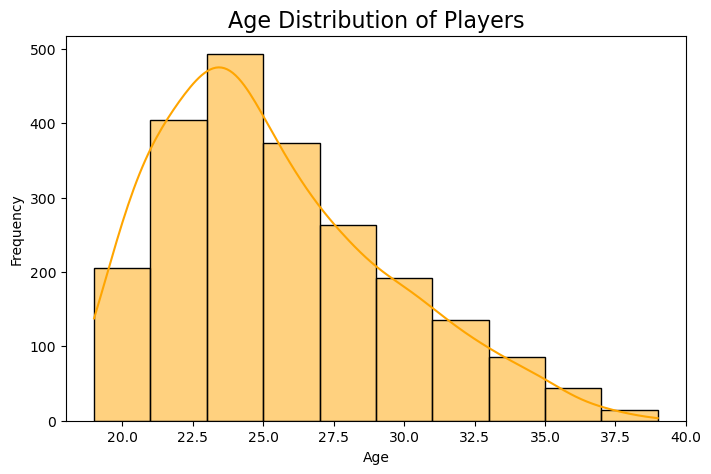

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='orange')
plt.title('Age Distribution of Players', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Graphs for prediction model (Injury)
Best ability is availability. So seeing the durability and how injury prone some players are when it comes to contract resigning is essential. This chart shows some of the leagues players that have missed the most days/games in recent years.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('nba_full_stats_2024.csv')

df['Injury_Days'] = pd.to_numeric(df['Injury_Days'], errors='coerce')

df = df.dropna(subset=['Injury_Days'])

unique_injury_data = df.groupby('Player')['Injury_Days'].max().reset_index()

sorted_injury_data = unique_injury_data.sort_values('Injury_Days', ascending=False)
top_injured_players = sorted_injury_data.head(60)

# Step 6: Create a Line Plot
plt.figure(figsize=(14, 7))
plt.plot(top_injured_players['Player'], top_injured_players['Injury_Days'], marker='o', color='tomato', linestyle='-', linewidth=2, markersize=8)
plt.title(f"Top 60 Players Missing the Most Games Due to Injuries", fontsize=16)
plt.xlabel("Player", fontsize=12)
plt.ylabel("Maximum Injury Days / Games Missed", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Graphs for prediction model
Players that have are the most popular and have the highest jersey sales. These players are the leaders in that category.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('nba_full_stats_2024.csv')

top_jersey_players = df[df['Jerseys_Multiplier'].notnull()]

top_15_jersey_sales = top_jersey_players.sort_values(by='Jerseys_Multiplier', ascending=False).head(15)

plt.figure(figsize=(12, 8))  # Increased figure size for better visibility
bars = plt.bar(
    top_15_jersey_sales['Player'], 
    top_15_jersey_sales['Jerseys_Multiplier'], 
    color='lightgreen'
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:.2f}',  
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.title("Top 15 NBA Players by Jersey Multiplier", fontsize=16)
plt.xlabel("Player", fontsize=12)
plt.ylabel("Jersey Multiplier", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


#### Graphs for prediction model 
This is a relationsal graph that shows the relation between salary and team valuation. 

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('nba_full_stats_2024.csv')

df_cleaned = df.dropna(subset=['Salary', 'Valuation_Multiplier'])

fig = px.scatter(df_cleaned, 
                 x='Valuation_Multiplier', 
                 y='Salary', 
                 hover_name='Player',  # Shows player name on hover
                 title='Relationship Between Salary and Valuation Multiplier',
                 labels={'Valuation_Multiplier': 'Valuation Multiplier', 'Salary': 'Salary'},
                 color='Salary',  # Optional: color by salary to enhance visual impact
                 color_continuous_scale='Blues')
fig.update_layout(
    height=800  # Adjust the height as needed
)

fig.update_traces(marker=dict(size=10, opacity=0.6))
fig.show()


#### Graphs for prediction model (Clutch factor and playoff performance)
Playoff point contributions are essential. Teams want to target players with playoff experience as well as highest point contributions against high caliber teams. These are some of the top players that always make it count during the most important parts of the basketball season. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('nba_full_stats_2024.csv')

# Select relevant columns
df_playoffs = df[['Player', 'season', 'p_PTS']]

# Drop rows where 'p_PTS' is NaN
df_playoffs = df_playoffs.dropna(subset=['p_PTS'])

# Find the top 10 players by total playoff points
total_playoff_points = df_playoffs.groupby('Player')['p_PTS'].sum().nlargest(10)

# Filter data to include only top players
top_players = df_playoffs[df_playoffs['Player'].isin(total_playoff_points.index)]

# Plot the data
plt.figure(figsize=(14, 8))

for player in top_players['Player'].unique():
    player_data = top_players[top_players['Player'] == player]
    plt.plot(player_data['season'], player_data['p_PTS'], label=player)

plt.title('Top 10 Playoff Performers: Playoff Points (p_PTS) Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Playoff Points (p_PTS)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()


#### Linear Regression
This linear regression model basically predicts player salary based on all the categorical information and stats available. It first reads/preprocesses the data, removes outliers in the upper and lower percentiles, handles missing data, train-test split 80%-20% split, standardizing features, trains the model, performs the prediction evaluation, and finally prepares data for visualization.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from scipy.stats import mstats


df = pd.read_csv('nba_full_stats_2024.csv')


df = df.dropna(subset=['Salary'])


df['Salary'] = mstats.winsorize(df['Salary'], limits=[0.05, 0.05])


predictors = ['Age', 'GS', 'MPG', 'FGA', '3P', '2PA', 'FTA', 'AST', 'STL', 'BLK', 'PF', 
              'PTS', 'PER', 'AST_percent', 'VORP', 'p_FGA', 'p_3P', 'p_3PA', 'p_2PA', 'p_FTA', 
              'Valuation_Multiplier', '3PAr', 'TOV_percent', 'p_FT', 'Injury_Days']

X = df[predictors]
y = df['Salary']


X = X.fillna(X.median())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


results_df = X_test.copy()
results_df['True Salary'] = y_test.values
results_df['Predicted Salary'] = y_pred
results_df['Residual'] = results_df['True Salary'] - results_df['Predicted Salary']


results_df['Player'] = df.loc[X_test.index, 'Player']
results_df['Team'] = df.loc[X_test.index, 'Team']
results_df['PTS'] = df.loc[X_test.index, 'PTS']
results_df['TRB'] = df.loc[X_test.index, 'TRB']
results_df['AST'] = df.loc[X_test.index, 'AST']
results_df['MPG'] = df.loc[X_test.index, 'MPG']
results_df['season'] = df.loc[X_test.index, 'season']

top_overpaid = results_df.nlargest(5, 'Residual')  
top_underpaid = results_df.nsmallest(5, 'Residual')  

results_df['Highlight'] = 'Normal'
results_df.loc[top_overpaid.index, 'Highlight'] = 'Overpaid'
results_df.loc[top_underpaid.index, 'Highlight'] = 'Underpaid'

fig = px.scatter(
    results_df,
    x='True Salary',
    y='Predicted Salary',
    color='Highlight',  
    hover_data=['Player', 'Team', 'PTS', 'TRB', 'AST', 'MPG', 'season'],  
    title='True vs Predicted Salary with Highlighted Outliers',
    labels={'x': 'True Salary', 'y': 'Predicted Salary'},
    opacity=0.7
)

# Line of Best Fit
fig.add_shape(
    type="line",
    x0=results_df['True Salary'].min(),
    y0=results_df['True Salary'].min(),
    x1=results_df['True Salary'].max(),
    y1=results_df['True Salary'].max(),
    line=dict(color="RoyalBlue", width=2, dash="dash")
)

fig.update_layout(
    xaxis_title="True Salary ($)",
    yaxis_title="Predicted Salary ($)",
    hovermode="closest",
    width=900,
    height=600
)

#### Linear Regression
OLS regression to analyze NBA player salaries, identifying key predictors like playing time and performance stats. It includes backward selection to refine the model by removing predictors with high p-values (above 0.1), focusing on the most statistically significant variables. The goal is to create a simpler, more interpretable model while understanding which factors have the strongest impact on salaries. Backward Selection


In [84]:

import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import mstats

# Load data
df = pd.read_csv('nba_full_stats_2024.csv')

# Drop rows where 'Salary' is missing
df = df.dropna(subset=['Salary'])

df['Salary'] = mstats.winsorize(df['Salary'], limits=[0.05, 0.05])

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
predictors = ['Age', 'GS', 'MPG', 'FGA', '3P', '2PA', 'FTA', 'AST', 'STL', 'BLK', 'PF', 
              'PTS', 'PER', 'AST_percent', 'VORP', 'p_FGA', 'p_3P', 'p_3PA', 'p_2PA', 'p_FTA', 
              'Valuation_Multiplier', '3PAr', 'TOV_percent', 'p_FT', 'Injury_Days']

X = df[predictors]
y = df['Salary']

X = X.fillna(X.median())

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:22:55   Log-Likelihood:                -23867.
No. Observations:                1399   AIC:                         4.779e+04
Df Residuals:                    1373   BIC:                         4.792e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.243e+07 